## Credit Risk ML Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
## Load the data
raw_data = pd.read_csv('Credit_Risk.csv')
raw_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
raw_data.shape

(614, 13)

In [4]:
raw_data.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001610,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [5]:
## Drop the "Loan_ID" column
raw_data.drop('Loan_ID', axis='columns', inplace=True)

In [6]:
raw_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Dealing with missing values

In [7]:
## Dealing with missing value
raw_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
raw_data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [9]:
## I will replace NaN values of "Self_Employed" column with 'NO'
raw_data['Self_Employed'] = raw_data['Self_Employed'].fillna(value = 'No')

In [10]:
raw_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
raw_data['LoanAmount'].value_counts() 

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [12]:
raw_data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [13]:
## Here I will fill NaN values of "Credit_History" with  its mode
raw_data['Credit_History'] = raw_data['Credit_History'].fillna(value=raw_data['Credit_History'].mode()[0], axis=0)

In [14]:
raw_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
## "LoanAmount" and "Loan_Amount_Term" I will replace with their mean
raw_data["LoanAmount"] = raw_data["LoanAmount"].fillna(raw_data["LoanAmount"].mean(), axis=0)
raw_data["Loan_Amount_Term"] = raw_data["Loan_Amount_Term"].fillna(raw_data["Loan_Amount_Term"].mean(), axis=0)

In [16]:
## I will drop the rest of the NaN values
data_no_mv = raw_data.dropna(axis=0)

In [17]:
data_no_mv.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
data_no_mv.shape

(586, 12)

In [19]:
data_no_mv.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,586.000000,586.000000,586.000000,586.000000
mean,5299.614334,1638.650034,145.433862,341.682594,0.861775
std,5852.248540,2975.456308,81.866658,64.457671,0.345431
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2843.750000,0.000000,100.000000,360.000000,1.000000
50%,3787.500000,1211.500000,128.000000,360.000000,1.000000
75%,5795.000000,2324.000000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,650.000000,480.000000,1.000000


### Exploring the PDFs (probability distribution function)

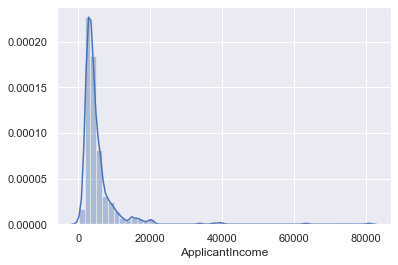

In [20]:
sns.distplot(data_no_mv['ApplicantIncome'])

In [21]:
q = data_no_mv['ApplicantIncome'].quantile(0.96)
data_1 = data_no_mv[data_no_mv['ApplicantIncome']<q]

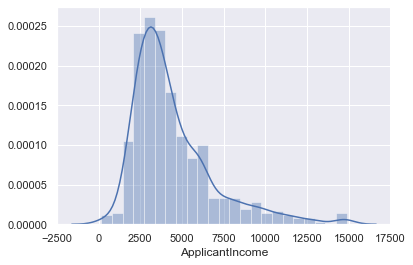

In [22]:
sns.distplot(data_1['ApplicantIncome'])

In [23]:
data_1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,562.000000,562.000000,562.000000,562.000000,562.000000
mean,4430.900356,1673.135089,137.910731,341.327402,0.862989
std,2468.953279,3008.790149,64.915934,64.749920,0.344165
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2765.000000,0.000000,100.000000,360.000000,1.000000
50%,3712.000000,1293.500000,127.500000,360.000000,1.000000
75%,5417.000000,2333.000000,160.000000,360.000000,1.000000
max,14880.000000,41667.000000,496.000000,480.000000,1.000000


In [24]:
data_1.shape

(562, 12)

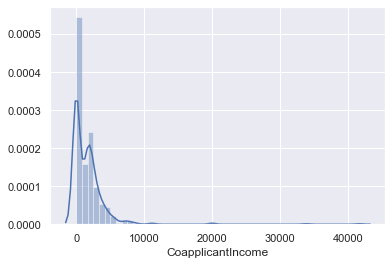

In [25]:
sns.distplot(data_1['CoapplicantIncome'])

In [26]:
q = data_1['CoapplicantIncome'].quantile(0.98)
data_2 = data_1[data_1['CoapplicantIncome']<q]

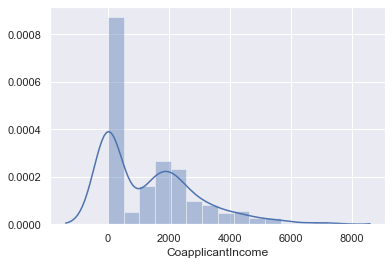

In [27]:
sns.distplot(data_2['CoapplicantIncome'])

In [28]:
data_2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,550.000000,550.000000,550.000000,550.000000,550.000000
mean,4423.983636,1371.341673,135.486966,341.465455,0.865455
std,2440.420153,1537.687509,60.977751,64.998681,0.341548
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2773.000000,0.000000,100.000000,360.000000,1.000000
50%,3712.000000,1239.500000,126.000000,360.000000,1.000000
75%,5376.500000,2252.250000,158.000000,360.000000,1.000000
max,14880.000000,7210.000000,496.000000,480.000000,1.000000


In [29]:
data_2.shape

(550, 12)

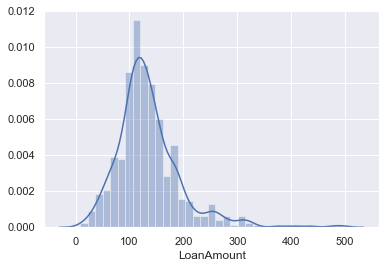

In [30]:
sns.distplot(data_2['LoanAmount'])

In [31]:
q = data_2['LoanAmount'].quantile(0.96)
data_3 = data_2[data_2['LoanAmount']<q]

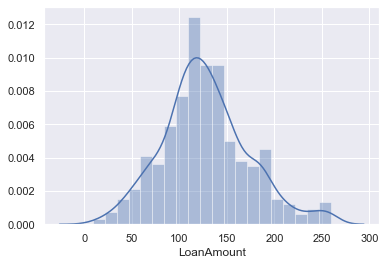

In [32]:
sns.distplot(data_3['LoanAmount'])

In [33]:
data_3.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,528.000000,528.000000,528.000000,528.000000,528.000000
mean,4240.570076,1321.204394,127.495892,341.034091,0.863636
std,2223.418998,1467.157214,45.687059,65.862363,0.343500
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2744.000000,0.000000,100.000000,360.000000,1.000000
50%,3656.000000,1211.500000,124.000000,360.000000,1.000000
75%,5000.000000,2191.000000,152.250000,360.000000,1.000000
max,14880.000000,7210.000000,259.000000,480.000000,1.000000


In [34]:
data_3.shape

(528, 12)

In [35]:
data_cleaned = data_3.reset_index(drop=True)

In [36]:
data_cleaned.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,528,528,528,528,528,528.000000,528.000000,528.000000,528.000000,528.000000,528,528
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,428,340,311,402,470,NaN,NaN,NaN,NaN,NaN,199,370
mean,NaN,NaN,NaN,NaN,NaN,4240.570076,1321.204394,127.495892,341.034091,0.863636,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,2223.418998,1467.157214,45.687059,65.862363,0.343500,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2744.000000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3656.000000,1211.500000,124.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5000.000000,2191.000000,152.250000,360.000000,1.000000,NaN,NaN


### Change dtype of target variable

In [37]:
data_cleaned['Loan_Status'].value_counts()

Y    370
N    158
Name: Loan_Status, dtype: int64

In [38]:
data_cleaned['Loan_Status'] = data_cleaned['Loan_Status'].map({"Y": 1, "N": 0})

In [39]:
data_cleaned['Loan_Status'].value_counts()

1    370
0    158
Name: Loan_Status, dtype: int64

In [40]:
data_cleaned.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [41]:
data_cleaned.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

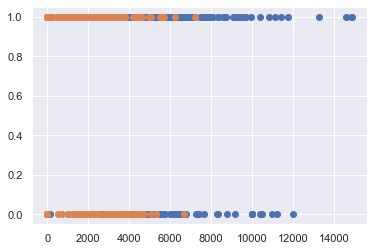

In [42]:
plt.scatter(data_cleaned['ApplicantIncome'], data_cleaned['Loan_Status'])
plt.scatter(data_cleaned['CoapplicantIncome'], data_cleaned['Loan_Status'])

### Define the correlated variables

In [43]:
df_corr = data_cleaned.corr(method='kendall')
corr = pd.DataFrame(df_corr['Loan_Status'])
corr

,Loan_Status
ApplicantIncome,-0.009398
CoapplicantIncome,0.068029
LoanAmount,-0.012360
Loan_Amount_Term,0.020937
Credit_History,0.547814
Loan_Status,1.000000


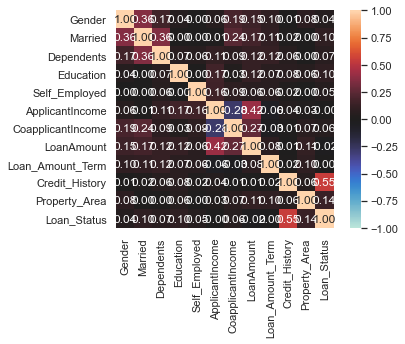

{'corr':                      Gender   Married  Dependents  Education  Self_Employed  \
 Gender             1.000000  0.360053    0.167485   0.042490       0.000000   
 Married            0.360053  1.000000    0.355905   0.000000       0.000000   
 Dependents         0.167485  0.355905    1.000000   0.067325       0.059416   
 Education          0.042490  0.000000    0.067325   1.000000       0.000000   
 Self_Employed      0.000000  0.000000    0.059416   0.000000       1.000000   
 ApplicantIncome    0.061630  0.012583    0.109709   0.167658       0.162098   
 CoapplicantIncome  0.193478  0.236138    0.085896   0.033990       0.088650   
 LoanAmount         0.154589  0.174642    0.122098   0.122715       0.062562   
 Loan_Amount_Term   0.100096  0.105050    0.122684   0.074434       0.063879   
 Credit_History     0.005122  0.015717    0.056884   0.075331       0.019254   
 Property_Area      0.083032  0.000000    0.000000   0.056451       0.000000   
 Loan_Status        0.043022  0.

In [44]:
from dython.nominal import associations
associations(data_cleaned)

In [45]:
data_correlated = data_cleaned[['Gender', 'Dependents', 'Education', 'Self_Employed', 'CoapplicantIncome', 'Credit_History', 'Loan_Status']]
data_correlated.head()

,Gender,Dependents,Education,Self_Employed,CoapplicantIncome,Credit_History,Loan_Status
0,Male,0,Graduate,No,0.0,1.0,1
1,Male,1,Graduate,No,1508.0,1.0,0
2,Male,0,Graduate,Yes,0.0,1.0,1
3,Male,0,Not Graduate,No,2358.0,1.0,1
4,Male,0,Graduate,No,0.0,1.0,1


### Change dtypes

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data_correlated.columns:
    if data_correlated[col].nunique() == 2:
        data_correlated[col] = le.fit_transform(data_correlated[col])

<ipython-input-46-ff190acfffc5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_correlated[col] = le.fit_transform(data_correlated[col])


In [47]:
data_correlated.head()

,Gender,Dependents,Education,Self_Employed,CoapplicantIncome,Credit_History,Loan_Status
0,1,0,0,0,0.0,1,1
1,1,1,0,0,1508.0,1,0
2,1,0,0,1,0.0,1,1
3,1,0,1,0,2358.0,1,1
4,1,0,0,0,0.0,1,1


In [48]:
data_with_dummies = pd.get_dummies(data_correlated)

In [49]:
data_with_dummies.head()

,Gender,Education,Self_Employed,CoapplicantIncome,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,1,0,0,0.0,1,1,1,0,0,0
1,1,0,0,1508.0,1,0,0,1,0,0
2,1,0,1,0.0,1,1,1,0,0,0
3,1,1,0,2358.0,1,1,1,0,0,0
4,1,0,0,0.0,1,1,1,0,0,0


### Multicollinearity

In [50]:
data_with_dummies.columns

Index(['Gender', 'Education', 'Self_Employed', 'CoapplicantIncome',
       'Credit_History', 'Loan_Status', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+'],
      dtype='object')

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var = data_with_dummies[['Gender', 'Education', 'Self_Employed', 'CoapplicantIncome',
       'Credit_History', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(var.values, i) for i in range(var.shape[1])]
vif['Features'] = var.columns
vif

,VIF,Features
0,1.087097,Gender
1,1.019972,Education
2,1.017331,Self_Employed
3,1.063021,CoapplicantIncome
4,1.008825,Credit_History
5,7.487978,Dependents_0
6,2.939277,Dependents_1
7,3.205517,Dependents_2
8,1.920686,Dependents_3+


### Rearrange a bit 

In [52]:
data_with_dummies.columns

Index(['Gender', 'Education', 'Self_Employed', 'CoapplicantIncome',
       'Credit_History', 'Loan_Status', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+'],
      dtype='object')

In [53]:
col = ['Loan_Status', 'Gender', 'Education', 'Self_Employed', 'CoapplicantIncome',
       'Credit_History', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+']
data_preprocessed = data_with_dummies[col]
data_preprocessed.head()

,Loan_Status,Gender,Education,Self_Employed,CoapplicantIncome,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,1,1,0,0,0.0,1,1,0,0,0
1,0,1,0,0,1508.0,1,0,1,0,0
2,1,1,0,1,0.0,1,1,0,0,0
3,1,1,1,0,2358.0,1,1,0,0,0
4,1,1,0,0,0.0,1,1,0,0,0


In [54]:
data_preprocessed.shape

(528, 10)

# Create Machine Learning Model

In [55]:
inputs = data_preprocessed.drop('Loan_Status', axis=1)
targets = data_preprocessed['Loan_Status']

In [56]:
targets.value_counts()

1    370
0    158
Name: Loan_Status, dtype: int64

In [57]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [58]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
inputs_smt, targets_smt = smote.fit_resample(inputs, targets)

In [59]:
targets_smt.value_counts()

1    370
0    370
Name: Loan_Status, dtype: int64

In [60]:
## ## Split data into train test part
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_smt, targets_smt, test_size = 0.3, random_state = 365)

### Log Regression

In [61]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

C:\Users\Ruslan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
print("Intercept: ", log_reg.intercept_)

Intercept:  [-4.06097806]


In [63]:
df_coef = pd.DataFrame(log_reg.coef_, columns = inputs.columns)
df_coef

,Gender,Education,Self_Employed,CoapplicantIncome,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,0.417895,-0.565472,0.535412,0.000145,3.46372,0.920574,0.704157,1.16177,0.747281


In [64]:
predictions = log_reg.predict_proba(x_test)
predictions

array([[0.2605701 , 0.7394299 ],
       [0.41986802, 0.58013198],
       [0.33765994, 0.66234006],
       [0.96401417, 0.03598583],
       [0.17441839, 0.82558161],
       [0.26864561, 0.73135439],
       [0.32110939, 0.67889061],
       [0.926471  , 0.073529  ],
       [0.93834187, 0.06165813],
       [0.95852896, 0.04147104],
       [0.25150839, 0.74849161],
       [0.32273952, 0.67726048],
       [0.29994521, 0.70005479],
       [0.24281789, 0.75718211],
       [0.3625042 , 0.6374958 ],
       [0.41986802, 0.58013198],
       [0.41986802, 0.58013198],
       [0.49938839, 0.50061161],
       [0.3963105 , 0.6036895 ],
       [0.22854814, 0.77145186],
       [0.21811514, 0.78188486],
       [0.41986802, 0.58013198],
       [0.26414849, 0.73585151],
       [0.94973749, 0.05026251],
       [0.41986802, 0.58013198],
       [0.91864206, 0.08135794],
       [0.24242112, 0.75757888],
       [0.29187112, 0.70812888],
       [0.34369698, 0.65630302],
       [0.91766264, 0.08233736],
       [0.

In [65]:
def confusion_matrix(inputs, actual_values, model):
    pred_values = model.predict(inputs)
    bins = np.array([0,0.5,1])
    cm = np.histogram2d(actual_values, pred_values, bins)[0]
    accuracy = (cm[0,0]+cm[1,1])/np.sum(cm)
    return cm, accuracy

In [66]:
cm = confusion_matrix(x_test, y_test, log_reg)
cm

(array([[ 69.,  44.],
        [  5., 104.]]),
 0.7792792792792793)

In [67]:
cm_df = pd.DataFrame(cm[0])
cm_df.columns = ["Predicted 0", "Predicted 1"]
cm_df = cm_df.rename(index = {0: "Actual 0", 1: "Actual 1"})
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,44.0
Actual 1,5.0,104.0


In [68]:
cm = np.array(cm_df)
accuracy = (cm[0,0]+cm[1,1])/cm.sum()
accuracy

0.7792792792792793

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, log_reg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.93      0.61      0.74       113
           1       0.70      0.95      0.81       109

    accuracy                           0.78       222
   macro avg       0.82      0.78      0.77       222
weighted avg       0.82      0.78      0.77       222



### Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [71]:
rfc.fit(x_train, y_train)
pred = rfc.predict(x_test)
pred

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1], dtype=int64)

In [72]:
from sklearn import metrics
print("Accuracy: \n", metrics.accuracy_score(y_test, pred))
print()
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, pred))

Accuracy: 
 0.7882882882882883

Confusion Matrix: 
 [[82 31]
 [16 93]]


In [73]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       113
           1       0.75      0.85      0.80       109

    accuracy                           0.79       222
   macro avg       0.79      0.79      0.79       222
weighted avg       0.79      0.79      0.79       222



In [74]:
## I will find best parameters for high accuracy using RandomizedSearchCV method
from sklearn.model_selection import RandomizedSearchCV

criterion = ["gini", "entropy"]

n_estimators = [int(x) for x in np.linspace(300, 1500, num=10)]

max_depth = [int(x) for x in np.linspace(100, 600, 10)]

max_features = ["auto", "sqrt"]

random_grid = {
    "criterion": criterion,
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "max_features": max_features
}


rfc_randomized = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3)

rfc_randomized.fit(x_train, y_train)

print(rfc_randomized.best_params_)

{'n_estimators': 700, 'max_features': 'sqrt', 'max_depth': 544, 'criterion': 'gini'}


In [75]:
rfc = RandomForestClassifier(criterion = 'gini', n_estimators = 700, max_depth = 544, max_features = "sqrt")
rfc.fit(x_train, y_train)
predictions = rfc.predict(x_test)
predictions

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1], dtype=int64)

In [76]:
df = pd.DataFrame({"Actual": y_test, "Prediction": predictions})
df.head()

,Actual,Prediction
453,0,1
46,0,1
94,1,1
580,0,0
153,1,1


In [77]:
## Accuracy and confusion marix
cm = metrics.confusion_matrix(y_test, predictions)
accuracy = metrics.accuracy_score(y_test, predictions)
clas_report = metrics.classification_report(y_test, predictions)
print(accuracy)
print()
print(cm)
print()
print(clas_report)

0.7882882882882883

[[82 31]
 [16 93]]

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       113
           1       0.75      0.85      0.80       109

    accuracy                           0.79       222
   macro avg       0.79      0.79      0.79       222
weighted avg       0.79      0.79      0.79       222



### Support Vector Classifier

In [78]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')

In [80]:
svc.fit(x_train, y_train)
predictions = svc.predict(x_test)
predictions

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [81]:
df = pd.DataFrame({"Actual": y_test, "Prediction": predictions})
df.head()

,Actual,Prediction
453,0,1
46,0,1
94,1,1
580,0,0
153,1,1


In [82]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: ", accuracy)
cm = metrics.confusion_matrix(y_test, predictions)
print("Confusion matrix: \n", cm)

Accuracy:  0.8018018018018018
Confusion matrix: 
 [[ 70  43]
 [  1 108]]


In [83]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.62      0.76       113
           1       0.72      0.99      0.83       109

    accuracy                           0.80       222
   macro avg       0.85      0.81      0.80       222
weighted avg       0.85      0.80      0.80       222



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
parametrs = {"C": [1, 10, 100, 1e3], "kernel": ['linear', 'rbf', "poly"], "gamma": [0.001, 0.0001]}

svc_randomized = RandomizedSearchCV(SVC(), parametrs, cv=5)
svc_randomized.fit(x_train, y_train)
print(svc_randomized.best_params_)

In [ ]:
svc = SVC(c = , kernel = , gamma = )
svc.fit(x_train, y_train) 
predicted = svc.predict(x_test)
predicted

In [ ]:
df_new = pd.DataFrame({"Actual": y_test, "Predicted": predicted})
df_new

In [ ]:
accuracy = metricsaccuracy_score(y_test, predicted)
print('accuracy score: ', accuracy)

In [ ]:
cm = metrics.confusion_matrix(y_test, predicted)
print("Confusion Matrix: ", cm)

In [ ]:
metrics.classification_report(y_test, predicted)